## Задание 1.1.1

In [1]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Neuron:
    
    def __init__(self, w, b):
        self.w = w
        self.b = b
    
    def feedforward(self, inputs):
        total = np.dot(self.w, inputs) + self.b
        return sigmoid(total)

class OurNeuralNetwork:
    
    def __init__(self):
        w = np.array([0.5, 0.5, 0.5])
        b = 0
        
        self.h1 = Neuron(w, b)
        self.h2 = Neuron(w, b)
        self.h3 = Neuron(w, b)
        
        self.o1 = Neuron(w, b)
        
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        
        return out_o1
    
network = OurNeuralNetwork()
x = np.array([2, 3, 4])
print(network.feedforward(x))
    

0.8151036049051821


In [2]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Neuron:
    
    def __init__(self, w, b):
        self.w = w
        self.b = b
    
    def feedforward(self, inputs):
        total = np.dot(self.w, inputs) + self.b
        return sigmoid(total)

class OurNeuralNetwork:
    
    def __init__(self):
        w = np.array([1, 0])
        b = 1
        
        self.h1 = Neuron(w, b)
        self.h2 = Neuron(w, b)
        
        self.o1 = Neuron(w, b)
        self.o2 = Neuron(w, b)
        
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1, out_o2
    
network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x))

(0.8757270529783324, 0.8757270529783324)


## Задание 1.1.2

In [3]:
import numpy as np

def tanh(x):
    return np.tanh(x)

class Neuron:
    
    def __init__(self, w, b):
        self.w = w
        self.b = b
    
    def feedforward(self, inputs):
        total = np.dot(self.w, inputs) + self.b
        return tanh(total)

class OurNeuralNetwork:
    
    def __init__(self):
        w = np.array([0.5, 0.5, 0.5])
        b = 0
        
        self.h1 = Neuron(w, b)
        self.h2 = Neuron(w, b)
        self.h3 = Neuron(w, b)
        
        self.o1 = Neuron(w, b)
        
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        
        return out_o1
    
network = OurNeuralNetwork()
x = np.array([2, 3, 4])
print(network.feedforward(x))

0.9050813365686774


In [4]:
import numpy as np

class Neuron:
    
    def __init__(self, w, b):
        self.w = w
        self.b = b
    
    def feedforward(self, inputs):
        total = np.dot(self.w, inputs) + self.b
        return max(0, total)

class OurNeuralNetwork:
    
    def __init__(self):
        w = np.array([0.5, 0.5, 0.5])
        b = 0
        
        self.h1 = Neuron(w, b)
        self.h2 = Neuron(w, b)
        self.h3 = Neuron(w, b)
        
        self.o1 = Neuron(w, b)
        
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        
        return out_o1
    
network = OurNeuralNetwork()
x = np.array([2, 3, 4])
print(network.feedforward(x))

6.75


## Задание 1.2.1

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

df = pd.read_csv('iris.csv', delimiter=',')
print(df.shape)
print(df['variety'].unique())
df.head()

(150, 5)
['Setosa' 'Versicolor' 'Virginica']


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [56]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, Y_train, Y_test = train_test_split(x, y,
    train_size = 0.60, test_size=0.40, random_state=0)

In [57]:
model = MLPClassifier(random_state=123)

model.fit(X_train, Y_train)

/home/ghukii/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=123)

In [58]:
y_pred = model.predict(X_test)

df = pd.DataFrame({'Actual' : Y_test, 'Predicted' : y_pred})
print(f'Точность test: {model.score(X_test, Y_test)}')
print(f'Точность train: {model.score(X_train, Y_train)}')
df

Точность test: 0.9666666666666667
Точность train: 0.9555555555555556


,Actual,Predicted
0,Virginica,Virginica
1,Versicolor,Versicolor
2,Setosa,Setosa
3,Virginica,Virginica
4,Setosa,Setosa
5,Virginica,Virginica
6,Setosa,Setosa
7,Versicolor,Versicolor
8,Versicolor,Versicolor
9,Versicolor,Versicolor


[[16  0  0]
 [ 0 21  2]
 [ 0  0 21]]


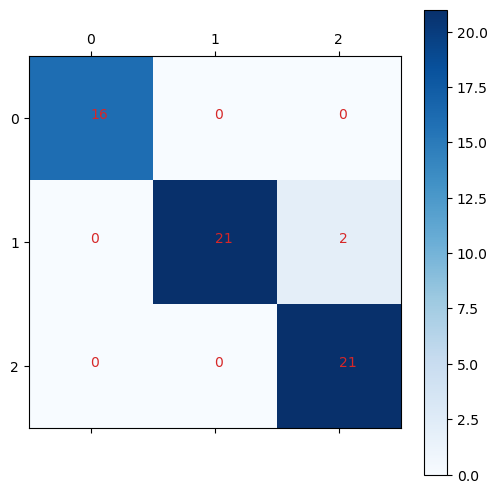

In [59]:
from sklearn.metrics import confusion_matrix

def plot_c_m(Y_test, Y_pred):
    
    c_m = confusion_matrix(Y_test, Y_pred)
    
    print(c_m)
    
    fig = plt.figure(figsize=(6, 6))
    plt.matshow(c_m, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(len(c_m)), range(len(c_m)))
    plt.xticks(range(len(c_m)), range(len(c_m)))
    plt.colorbar();
    
    for i in range(len(c_m)):
        for j in range(len(c_m)):
            plt.text(i, j, str(c_m[j, i]), color='tab:red')
            
            
plot_c_m(Y_test, model.predict(X_test))

In [60]:
# Регрессия
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

df = pd.read_csv('YS.csv')
print(df.shape)
df.head(5)

(30, 2)


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [61]:
x = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary'].values

#x = np.vstack((x, np.ones(len(x)))).T


X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.85, test_size=0.15, random_state = 123)

In [62]:
model = MLPRegressor(random_state = 123)
model.fit(X_train, Y_train)

/home/ghukii/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(random_state=123)

In [63]:
y_pred = model.predict(X_test)

a_p = pd.DataFrame({'Actual' : Y_test, 'Predicted' : y_pred})
a_p

,Actual,Predicted
0,54445.0,20.267300
1,121872.0,55.288369
2,56642.0,18.826111
3,116969.0,50.492217
4,64445.0,20.267300


In [64]:
print(model.loss_)
print(model.coefs_)
print(model.n_iter_)

3122040674.939079
[array([[ 3.79590679e-01, -8.04023063e-02, -1.55122653e-02,
         2.66261695e-01,  3.50331815e-01,  2.52478422e-01,
         8.93235655e-02,  3.40915658e-01,  2.50649387e-01,
         1.82675040e-05, -6.31856177e-04,  4.04718374e-01,
         5.95309785e-08,  1.23099536e-01,  1.44332427e-05,
         3.93787686e-01, -4.65442588e-02, -2.84489933e-02,
         7.59154326e-07, -5.19057666e-02,  2.61448259e-01,
         3.98851991e-01,  1.58381742e-02,  2.88312623e-01,
         3.40347458e-01, -1.51911090e-01, -1.59912110e-04,
         7.83252333e-02, -1.26609067e-01,  3.86635800e-03,
        -1.12886534e-01, -1.62867215e-06, -4.78930122e-02,
         2.39893479e-01,  2.09491170e-01, -2.44043355e-03,
        -3.82646112e-06,  4.20346623e-01,  4.98975090e-01,
         2.67814249e-01,  1.74951639e-02, -4.69258340e-02,
         1.94319704e-01, -3.57614687e-02,  2.44670051e-02,
        -1.16903796e-01,  2.25891564e-01,  2.95446739e-01,
         2.53201848e-01,  2.96159776e